<a href="https://colab.research.google.com/github/jl729/jl729/blob/main/Marketing_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [ ]:
data = pd.read_csv('gdrive/My Drive/AB_test_data.csv')

In [ ]:
data.head()

,purchase_TF,Variant,date,id
0,False,A,2019-11-08,0x25b44a
1,False,B,2020-08-27,0x46271e
2,False,A,2020-06-11,0x80b8f1
3,False,B,2020-08-22,0x8d736d
4,False,A,2020-08-05,0x96c9c8


1. Conduct an A/B test to determine whether Alternative B improved conversion rates (site
users book the property) over alternative A.

H0: Alternative B has no improvement on conversion rates

Ha: Alternative B has improvement on conversion rates

H0: μA = μB

Ha: μA < μB

In [ ]:
data['purchase_binary'] = np.where(data['purchase_TF'] != True, 0, 1)

In [ ]:
VariantA = data[data['Variant'] == 'A']
VariantB = data[data['Variant'] == 'B']

In [ ]:
sample_average = data['purchase_binary'].mean()

In [ ]:
A_mean = VariantA['purchase_binary'].mean()
B_mean = VariantB['purchase_binary'].mean()
std = data['purchase_binary'].std()
n_A = len(VariantA)
n_B = len(VariantB)

In [ ]:
mean_diff = B_mean - A_mean
sample_std = ((std**2*(1/n_A + 1/n_B))**0.5)
z_score = mean_diff/sample_std
print(z_score)

5.230467601048211


As the z-score is 5.230467601048211, which is greater than the critical number (1.645) for one sided z test with 95% confidence level, so we reject the null hypothesis that alternative B has no improvement on conversion rates. 

2. Calculate the optimal sample size for a 95% confidence rate and test with 80% power.
Conduct the test 10 times using samples of the optimal size. Report results.

In [ ]:
CI = 0.95
α = 0.05
β = 0.02 

In [ ]:
serA = data['purchase_binary'].value_counts()
ser = VariantB['purchase_binary'].value_counts()

In [ ]:
p = ser[1]/len(VariantB)
p0 = serA[0]/len(data)
p1 = serA[1]/len(data)

In [ ]:
z_score_alpha = 1.645
z_score_beta = 0.84
delta = 0.84 * (B_mean - A_mean) + (B_mean - A_mean)  

In [ ]:
n = ((z_score_alpha*(2*p*(1-p))**0.5 + z_score_beta*(p0*(1-p0)+p1*(1-p1))**0.5)**2)/(delta**2)
print(n)

698.3250198276319


In [ ]:
count = 0
while count <= 10:
  control_sample = data[data['Variant'] == 'A'].sample(n=699)
  treatment_sample = data[data['Variant'] == 'B'].sample(n=699)

  ab_test = pd.concat([control_sample, treatment_sample], axis=0)
  ab_test.reset_index(drop=True, inplace=True)

  A_mean = control_sample['purchase_binary'].mean()
  B_mean = treatment_sample['purchase_binary'].mean()
  std = ab_test['purchase_binary'].std()
  n_A = len(control_sample)
  n_B = len(treatment_sample)

  mean_diff = B_mean - A_mean
  sample_std = ((std**2*(1/n_A + 1/n_B))**0.5)
  z_score = mean_diff/sample_std
  print(z_score)
  count +=1

0.9051232300136663
-1.0203946692776775
1.3538218563108753
0.6010118595609371
2.0659786894425602
0.789132563750809
2.2777327121810997
3.1172761908951836
1.1458658247221607
1.6152393947050454
0.7089870497618387


In [ ]:
# not sample control group
count = 0
while count <= 10:
  treatment_sample = data[data['Variant'] == 'B'].sample(n=699)

  ab_test = pd.concat([VariantA, treatment_sample], axis=0)
  ab_test.reset_index(drop=True, inplace=True)

  A_mean = VariantA['purchase_binary'].mean()
  B_mean = treatment_sample['purchase_binary'].mean()
  std = ab_test['purchase_binary'].std()
  n_A = len(VariantA)
  n_B = len(treatment_sample)

  mean_diff = B_mean - A_mean
  sample_std = ((std**2*(1/n_A + 1/n_B))**0.5)
  z_score = mean_diff/sample_std
  print(z_score)
  count +=1

2.5807002156198124
0.5728923440068147
0.25571736349493096
2.1581425157635925
1.5241673269672535
0.6786080765112231
0.7843191795412469
1.4184886130864995
2.052491540100476
2.1581425157635925
1.841175723647309


3. Conduct a sequential test for the 10 samples. For any of the samples, were you able to
stop the test prior to using the full sample? What was the average number of iterations required to stop the test?

In [ ]:
ln = np.log
lnA = ln(1/α)
lnB = ln(β) 

In [ ]:
print(lnA)
print(lnB)

2.995732273553991
-3.912023005428146


In [ ]:
sample_time = 1
total = 0

while sample_time <= 10:
  ln_lambda = 0
  n=1
  
  while lnB <= ln_lambda and ln_lambda <= lnA:
    sample = data[data['Variant'] == 'B'].sample(n=1)

    if pd.Series(sample['purchase_binary'] == 1).bool():
      update = ln(p/p1)
    else:
      update = ln((1-p)/p1)

    ln_lambda += update
    n += 1
  
  print('When time = %d, iterations = %d.' %(sample_time, n))
  total += n
  sample_time += 1

average = total/sample_time
print(average)

When time = 1, iterations = 4.
When time = 2, iterations = 4.
When time = 3, iterations = 3.
When time = 4, iterations = 3.
When time = 5, iterations = 4.
When time = 6, iterations = 3.
When time = 7, iterations = 4.
When time = 8, iterations = 5.
When time = 9, iterations = 5.
When time = 10, iterations = 4.
3.5454545454545454


In [ ]:
!pip install sprt

  Created wheel for sprt: filename=sprt-0.0.1-py3-none-any.whl size=4036 sha256=cfd74affe68eb37193e03925da618b62ab958a61a9e2fa6d87709a5935acd42e
  Stored in directory: /root/.cache/pip/wheels/8d/2d/0c/d0736d530abed996fcbfbe0aacc965e314249bd43af3b24c70
Successfully built sprt


In [ ]:
import sprt as sprt
import numpy as np

test = sprt.SPRTNormal(alpha = 0.05, beta = 0.2, h0 = 0, h1 = 1, 
values = np.random.normal(0, 1, 10), 
variance = 1)

Decision:	Accept

    values  lower  upper
n                       
1   -1.332 -1.058  3.273
2   -0.818 -0.558  3.773
3   -1.498 -0.058  4.273
4   -0.414  0.442  4.773
5   -1.591  0.942  5.273
6   -1.490  1.442  5.773
7   -1.374  1.942  6.273
8   -0.481  2.442  6.773
9    0.066  2.942  7.273
10   0.381  3.442  7.773


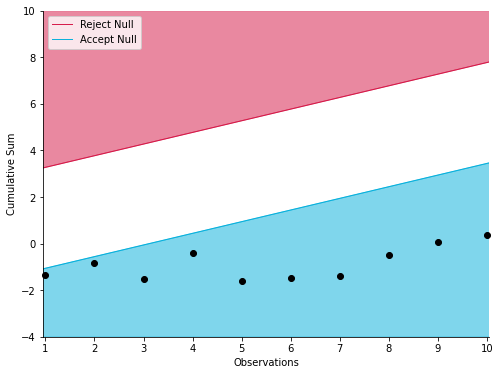

In [ ]:
test.plot()